In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from matplotlib.pyplot import figure
from decimal import *
from correlation_Matrix.ipynb import correlation_matrix

In [2]:
def concatenate_Frames(frames, timeframe):
    df = pd.DataFrame()
    for frame_name in frames:
        frame = pd.read_csv(frame_name)
        frame = pd.DataFrame(frame["close"])
        frame = frame[-timeframe:]
        frame.reset_index(inplace=True)
        frame = frame["close"]
        df[f"{frame_name[:-4]}"] = frame
    return df

In [49]:
frame = concatenate_Frames(["AAPL.csv", "GCI.csv"], 1000)
frame

,AAPL,GCI
0,77.4075,5.94
1,77.5825,5.81
2,79.2400,6.06
3,78.1700,6.17
4,77.8350,6.82
...,...,...
995,194.6800,2.62
996,193.6000,2.59
997,193.0500,2.48
998,193.1500,2.46


In [146]:
baseline_frame = yf.download(tickers=["SPY"])
baseline_frame = baseline_frame[-500:]
baseline_frame = pd.DataFrame(baseline_frame["Close"])
baseline_frame


[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2022-01-10,465.510010
2022-01-11,469.750000
2022-01-12,471.019989
2022-01-13,464.529999
2022-01-14,464.720001
...,...
2023-12-29,475.309998
2024-01-02,472.649994
2024-01-03,468.790009


In [ ]:
if ((close_data.iloc[day-200:day, stock_number].max() > close_data.iloc[day, stock_number] and (portfolio_Balance < (max_amount-close_data.iloc[day, stock_number])))):
                plt.axvline(close_data.index[day], color='blue',linestyle='dashed') 
                portfolio_trades[stock_number].append(close_data.iloc[day, stock_number])
                #print(f"added balance: {portfolio_Balance } + {close_data.iloc[day, stock_number]}")
                portfolio_Balance = portfolio_Balance + close_data.iloc[day, stock_number]
                portfolio_Balance_OT.append(portfolio_Balance)    
                portfolio_Balance_OT.append(portfolio_Balance)
                positions_list[stock_number] = positions_list[stock_number] + pos_size
                num_of_buys = num_of_buys +1
                print(f"bought {Tickers[stock_number]} at {close_data.iloc[day, stock_number]}, Balance: {portfolio_Balance}")
                  
            elif (close_data.iloc[day-200:day, stock_number].min() < close_data.iloc[day, stock_number] and positions_list[stock_number] >= pos_size):
                plt.axvline(close_data.index[day], color='red',linestyle='dashed')
                positions_list[stock_number] = positions_list[stock_number] - pos_size
                bought_at = portfolio_trades[stock_number].pop(0)
                profit_and_loss = profit_and_loss + (close_data.iloc[day, stock_number] - bought_at)
                portfolio_Balance = portfolio_Balance - close_data.iloc[day, stock_number]
                print(f"Sold {Tickers[stock_number]} at {close_data.iloc[day, stock_number]} and was bought at {bought_at} with profit: {close_data.iloc[day, stock_number]-bought_at}, balance: {portfolio_Balance}")
                profit_and_loss_graph.append(profit_and_loss)

In [323]:
df = yf.download(tickers=["SPY", "AMZN", "GCI", "V", "RTX", "ADBE", "AVGO", "ULTA"], start="2023-01-10")["Close"]
diffirenced_df = df[:10].pct_change().dropna()
#corr = diffirenced_df.corr()
Tickers = diffirenced_df.columns.values.tolist()
corr

[*********************100%%**********************]  8 of 8 completed


,ADBE,AMZN,AVGO,GCI,RTX,SPY,ULTA,V
ADBE,1.000000,0.531192,0.609773,0.543602,0.169140,0.834360,0.266794,0.746254
AMZN,0.531192,1.000000,0.363142,0.235769,-0.123908,0.710632,0.299315,0.408714
AVGO,0.609773,0.363142,1.000000,0.894092,0.708635,0.773628,0.717465,0.393756
GCI,0.543602,0.235769,0.894092,1.000000,0.652746,0.755338,0.526813,0.448587
RTX,0.169140,-0.123908,0.708635,0.652746,1.000000,0.423306,0.252262,0.320719
SPY,0.834360,0.710632,0.773628,0.755338,0.423306,1.000000,0.347657,0.757404
ULTA,0.266794,0.299315,0.717465,0.526813,0.252262,0.347657,1.000000,-0.222214
V,0.746254,0.408714,0.393756,0.448587,0.320719,0.757404,-0.222214,1.000000


In [302]:
buy_list = []
for stock_number in range(len(Tickers)):
    
    for stock_number2 in range(len(Tickers)):
        if stock_number2 == stock_number:
            continue
        if corr.iloc[stock_number2,stock_number] < 0.5:
            if ([stock_number, stock_number2]) in buy_list:
                continue
            print(f"buy {Tickers[stock_number2]} and {Tickers[stock_number]}")
            buy_list.append([stock_number2,stock_number])
        #print(corr.iloc[row,column])  
buy_list     

buy GCI and AMZN
buy V and AMZN
buy V and GCI


[[1, 0], [3, 0], [3, 1]]

In [344]:
def BackTest(df, max_amount): 
    df = pd.DataFrame(df)  
    Tickers = df.columns.values.tolist()
    close_data = df
    diffirenced_df = df.pct_change()
    #baseline
    days_amount = df.shape[0]
    baseline_frame = yf.download(tickers=["SPY"])
    baseline_frame = baseline_frame[-days_amount:]
    baseline_frame = pd.DataFrame(baseline_frame["Close"])
    baseline_PnL_OT = []
    for day in range(0,len(baseline_frame.index)):
        baseline_PnL_OT.append(((baseline_frame.iloc[day,0]-baseline_frame.iloc[0,0])/baseline_frame.iloc[0,0])*100)
    baseline_PnL_OT_frame = pd.DataFrame(baseline_PnL_OT)
    
    pos_size = 1
    figure(figsize=(20, 15), dpi=80)
    close_data.plot()
    close_data.plot()
    plt.title("Buys and Sells")
    portfolio_trades = [[],[],[],[],[],[],[],[]]
    portfolio_Balance = 0.0
    portfolio_Balance_OT = []
    positions_list  = []
    profit_and_loss = 0
    profit_and_loss_graph = []
    unrealised_pnl = 0.0 
    num_of_buys = 0
    for i in range(len(Tickers)):
        positions_list.append(0)
        
    for day in range(110, len(close_data.index),7):
        diffirenced_df = df[day-10:day].pct_change().dropna()
        corr_matrix = diffirenced_df.corr()
        for stock_number in range(len(Tickers)):
            buy_list = []
            sell_list = []
            for stock_number2 in range(len(Tickers)):
                if stock_number2 == stock_number:
                    continue
            if corr_matrix.iloc[stock_number2,stock_number] < -0.5:
                if ([stock_number, stock_number2]) in buy_list:
                    continue
                #print(f"buy {Tickers[stock_number2]} and {Tickers[stock_number]}")
                #buy_list.append([stock_number2,stock_number])
                plt.axvline(close_data.index[day], color='blue',linestyle='dashed') 
                portfolio_trades[stock_number].append(close_data.iloc[day, stock_number])
                #print(f"added balance: {portfolio_Balance } + {close_data.iloc[day, stock_number]}")
                portfolio_Balance = portfolio_Balance + close_data.iloc[day, stock_number]
                portfolio_Balance_OT.append(portfolio_Balance)    
                portfolio_Balance_OT.append(portfolio_Balance)
                positions_list[stock_number] = positions_list[stock_number] + pos_size
                num_of_buys = num_of_buys +1
                print(f"bought {Tickers[stock_number]} with pair: {Tickers[stock_number2]} with corr: {corr_matrix.iloc[stock_number2,stock_number] } at {close_data.iloc[day, stock_number]}, Balance: {portfolio_Balance}")
                  
            elif corr_matrix.iloc[stock_number2,stock_number] > -0.99 and len(portfolio_trades[stock_number]) >=1 and len(portfolio_trades[stock_number2]) >=1:
                print(f"Sold {Tickers[stock_number]} at {close_data.iloc[day, stock_number]} and was bought at {bought_at} with profit: {close_data.iloc[day, stock_number]-bought_at}, balance: {portfolio_Balance}")
                if ([stock_number, stock_number2]) in sell_list:
                    continue
                
                plt.axvline(close_data.index[day], color='red',linestyle='dashed')
                positions_list[stock_number] = positions_list[stock_number] - pos_size
                
                bought_at = portfolio_trades[stock_number].pop(0)
                profit_and_loss = profit_and_loss + (close_data.iloc[day, stock_number] - bought_at)
                portfolio_Balance = portfolio_Balance - close_data.iloc[day, stock_number]
                
                profit_and_loss_graph.append(profit_and_loss)
                
                
                
                
                
                
    if(len(portfolio_trades) != 0):        
        for stock_number in range(len(Tickers)):
            for trade in portfolio_trades[stock_number]:
                unrealised_pnl = unrealised_pnl + (close_data.iloc[-1, stock_number] - trade)
                print(f"Stock: {Tickers[stock_number]}, bought for: {trade}, currently: {close_data.iloc[-1, stock_number]}")
    if(num_of_buys ==0):
        return("No Buys or Sells")
    profit_and_loss_graph_Frame = pd.DataFrame(profit_and_loss_graph)
    pnl_percentage = []
    for day in range(0,len(profit_and_loss_graph_Frame.index)):
        pnl_percentage.append(((profit_and_loss_graph_Frame.iloc[day,0])/max_amount)*100) 
    if len(pnl_percentage) >0:
        pnl_percentage[-1] = pnl_percentage[-1] + (unrealised_pnl/max_amount)*100
        pnl_percentage_frame = pd.DataFrame(pnl_percentage)
      
    portfolio_Balance_OT_Frame = pd.DataFrame(portfolio_Balance_OT)
    portfolio_Balance_OT_Frame.plot()
    plt.title("Portfolio Balance")
    
    pnl_percentage_frame.plot()
    #plt.plot(baseline_PnL_OT_frame)
    baseline_PnL_OT_frame.plot()
    print(f"Position:  {positions_list}")
    print(f"Realised P&L:  {profit_and_loss}")
    print(f"Unrealised P&L:  {unrealised_pnl}")
    print(f"P&L:  {unrealised_pnl + profit_and_loss}")
    print(f"ROI:  {((unrealised_pnl + profit_and_loss)/portfolio_Balance_OT_Frame.max())*100}%")
    print(f"ROI Of Baseline:  {baseline_PnL_OT_frame.iloc[-1,0]}%")

[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  1 of 1 completed
bought AVGO with pair: V with corr: -0.5008282080942688 at 85.0199966430664, Balance: 85.0199966430664
bought AMZN with pair: V with corr: -0.6832379293915576 at 16.32699966430664, Balance: 101.34699630737305
bought AVGO with pair: V with corr: -0.509038568277593 at 89.25, Balance: 190.59699630737305
bought AMZN with pair: V with corr: -0.6217196930170139 at 27.604999542236328, Balance: 218.20199584960938
bought GCI with pair: V with corr: -0.5958202115750608 at 16.229999542236328, Balance: 234.4319953918457
bought ADBE with pair: V with corr: -0.5831315347277105 at 102.30999755859375, Balance: 336.74199295043945
bought ULTA with pair: V with corr: -0.5227506060204148 at 247.2100067138672, Balance: 583.9519996643066
bought AMZN with pair: V with corr: -0.8087262183926381 at 41.37300109863281, Balance: 625.3250007629395
bought ADBE with pair: V with c

UnboundLocalError: cannot access local variable 'pnl_percentage_frame' where it is not associated with a value

<Figure size 1600x1200 with 0 Axes>

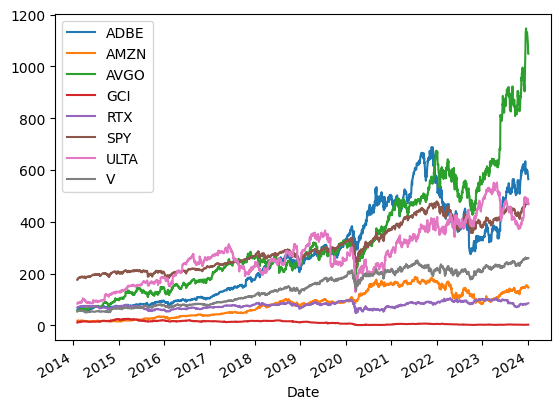

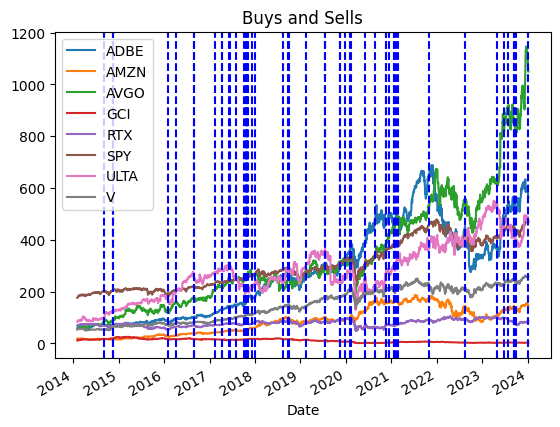

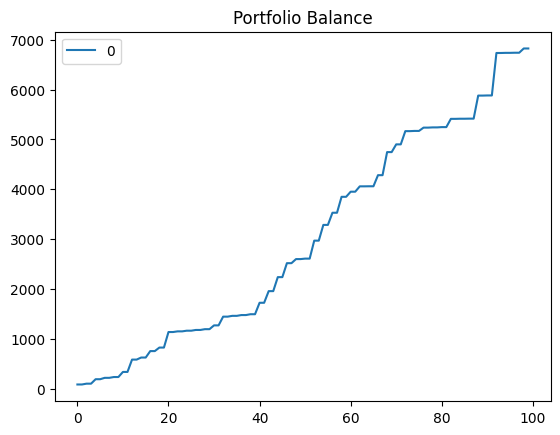

In [345]:
df = yf.download(tickers=["SPY", "AMZN", "GCI", "V", "RTX", "ADBE", "AVGO", "ULTA"], start="2012-01-10")["Close"]
df = df.dropna()
BackTest(df, 1000)